In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print ('Python: {}'.format(sys.version))
print ('Numpy: {}'.format(numpy.__version__))
print ('Pandas: {}'.format(pandas.__version__))
print ('Matplotlib: {}'.format(matplotlib.__version__))
print ('Seaborn: {}'.format(seaborn.__version__))
print ('Scipy: {}'.format(scipy.__version__))
print ('Sklearn: {}'.format(sklearn.__version__))

Python: 3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ]
Numpy: 1.21.5
Pandas: 1.4.4
Matplotlib: 3.5.2
Seaborn: 0.11.2
Scipy: 1.9.1
Sklearn: 1.0.2


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import scipy.signal as sg
from tqdm import tqdm_notebook

In [18]:
data=pd.read_csv('./earthquake.h5')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x89 in position 0: invalid start byte

In [ ]:
print(data.shape)

In [ ]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


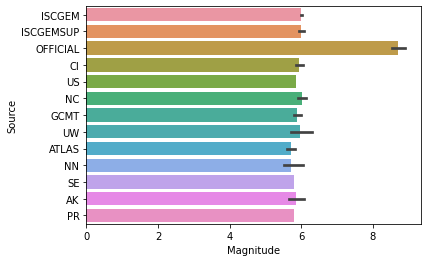

In [ ]:
sns.barplot(x='Magnitude', y='Source',data=data)
plt.xlable=('Magnitude')
plt.ylable=('Source')
plt.show()

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile1 = ProfileReport(data, title="Pandas Profile Report")

NameError: ignored

In [ ]:
profile1

NameError: ignored

In [ ]:
def understand_numeric_column(DataFrame,Col):
    
    """Finds the Skewness,Distribution and statistics of the column"""
    
    print("------------------")
    print("printing the summary statistics ",format(Col))
    print("")
    print(DataFrame[Col].describe())
    print("--------------------")
    print("The Skewness of" ,format(Col))
    print("Skewness: %f" % data['Magnitude'].skew())
    print("")
    print("--------------------")
    print("The distribution of ",format(Col))
    print("")
    print(sns.distplot(data["Magnitude"]))
    print("")
    #train["SalePrice"]=np.log(train["SalePrice"])
    
def find_top_N_Correlated_Feature(N,Col,DataFrame):
    
    """Prints the top N highly correlated feature matrix """
    
    corrmat = DataFrame.corr()
    cols = corrmat.nlargest(N, Col)[Col].index     
    cm = np.corrcoef(DataFrame[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
    plt.show()

def Finding_Missing_Value(DataFrame): 
    
    """Find the Missing Value Percentage Column Wise"""
    
    total=DataFrame.isnull().sum().sort_values(ascending=False)
    percent=(DataFrame.isnull().sum()/DataFrame.isnull().count()).sort_values(ascending=False)
    missing_data=pd.concat([total,percent],axis=1, keys=["Total","Percent"])
    print("")
    print("--------------------")
    print("Column wise Percentage of Missing Values",format(DataFrame))
    print("")
    print(missing_data)

------------------
printing the summary statistics  Magnitude

count    23412.000000
mean         5.882531
std          0.423066
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: Magnitude, dtype: float64
--------------------
The Skewness of Magnitude
Skewness: 1.848346

--------------------
The distribution of  Magnitude

AxesSubplot(0.125,0.125;0.775x0.755)



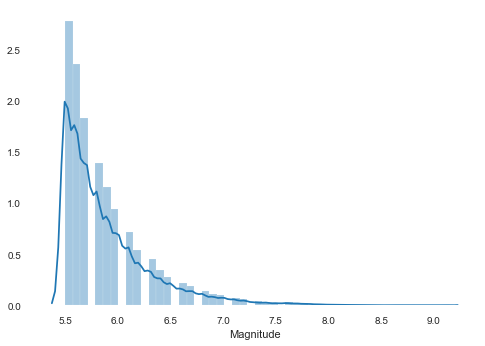

In [ ]:
understand_numeric_column(data,"Magnitude")

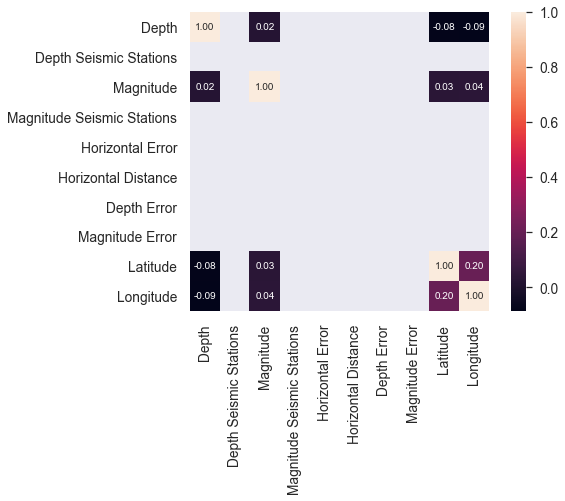

In [ ]:
find_top_N_Correlated_Feature(10,'Depth',data)

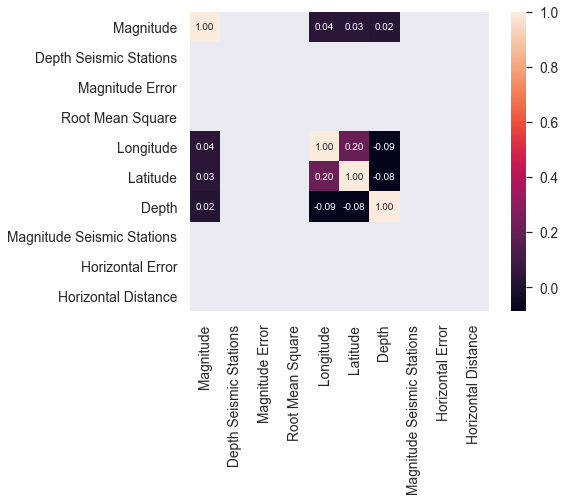

In [ ]:
find_top_N_Correlated_Feature(10,'Magnitude',data)

C:\Users\rahul\anaconda3\envs\pytorchenv\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


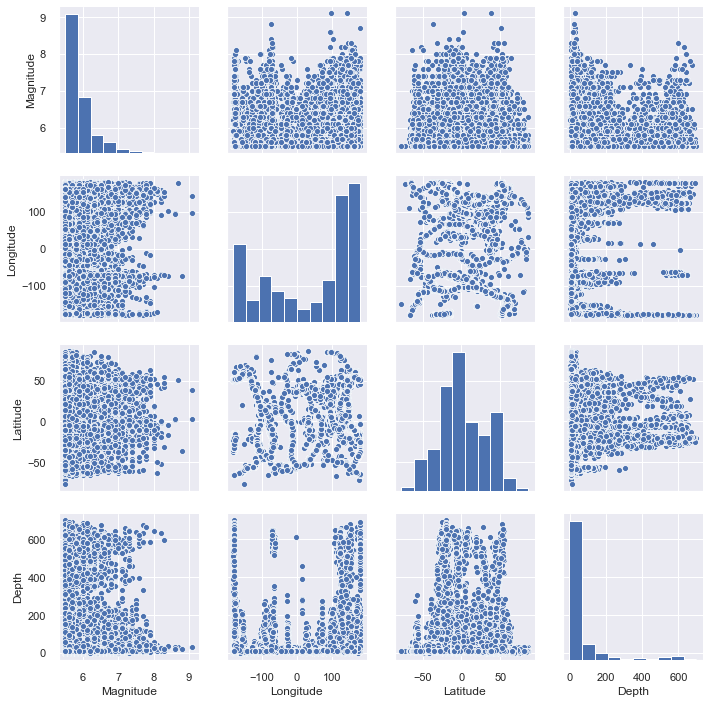

In [ ]:
sns.set()
cols = ['Magnitude', 'Longitude', 'Latitude', 'Depth']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [ ]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1, keys=["Total","Percent"])
#dealing with missing data
data = data.drop((missing_data[missing_data['Total'] > 81]).index,1)
#data['Depth Seismic Stations'] = data['Depth Seismic Stations'].fillna(data['Depth Seismic Stations'].mean())
#data['Root Mean Square'] = data['Root Mean Square'].fillna(data['Root Mean Square'].mean())

In [ ]:
data["Type"].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   ID                23412 non-null  object 
 9   Source            23412 non-null  object 
 10  Location Source   23412 non-null  object 
 11  Magnitude Source  23412 non-null  object 
 12  Status            23412 non-null  object 
dtypes: float64(4), object(9)
memory usage: 2.3+ MB


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('Magnitude', axis=1), data['Magnitude'], test_size=0.2)

In [ ]:
data.loc[845]

Date                  01/26/1968
Time                    04:45:44
Latitude                  -8.875
Longitude                120.265
Type                  Earthquake
Depth                       30.6
Magnitude                    6.8
Magnitude Type                MW
ID                  ISCGEM827666
Source                    ISCGEM
Location Source           ISCGEM
Magnitude Source          ISCGEM
Status                 Automatic
Name: 845, dtype: object

In [ ]:
X_train.head(1)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
5841,03/28/1981,01:07:10,-5.759,151.011,Earthquake,73.7,MB,USP0001CX3,US,US,US,Reviewed


In [ ]:
def Standardize_Data(DataFrame):

    """Standardize the data"""
    std = StandardScaler()
    std_data=std.fit_transform(DataFrame)
    
    print("-------------------")
    print("")
    print("standardized the data")
    print("The mean of the col is",std_data.mean())
    print("")
    print("The std of the col is",std_data.std())
    return std_data

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18729, 12), (4683, 12), (18729,), (4683,))

In [ ]:
X_train

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
5841,03/28/1981,01:07:10,-5.7590,151.0110,Earthquake,73.7,MB,USP0001CX3,US,US,US,Reviewed
2588,01/18/1973,09:28:14,-6.8680,149.9930,Earthquake,43.0,MS,USP000006K,US,US,US,Reviewed
17328,03/26/2005,15:40:35,-4.8940,129.9380,Earthquake,10.0,MWB,USP000DK3V,US,US,US,Reviewed
8684,09/27/1987,21:22:35,-21.5030,169.7780,Earthquake,33.0,MS,USP00038SJ,US,US,US,Reviewed
536,10/16/1966,09:13:28,29.7340,142.6690,Earthquake,15.0,MW,ISCGEM842540,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...
21409,08/30/2012,12:18:43,-50.1430,114.0800,Earthquake,10.0,MWC,USP000JR4W,US,US,GCMT,Reviewed
6009,11/03/1981,13:47:34,43.5420,-127.7060,Earthquake,10.0,MS,USP0001GSW,US,US,US,Reviewed
21912,10/01/2013,03:38:22,53.1995,152.7864,Earthquake,573.0,MWW,USB000K3C1,US,US,US,Reviewed
8150,08/26/1986,21:52:27,-15.1920,-173.4810,Earthquake,20.8,MW,USP0002XJU,US,US,HRV,Reviewed


In [ ]:
y_train

5841     5.5
2588     6.8
17328    6.1
8684     5.6
536      5.7
        ... 
21409    5.6
6009     6.2
21912    6.7
8150     5.9
22584    6.5
Name: Magnitude, Length: 18729, dtype: float64

In [ ]:
X_train.drop(['Date'], axis=1)

,Time,Latitude,Longitude,Type,Depth,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
5841,01:07:10,-5.7590,151.0110,Earthquake,73.7,MB,USP0001CX3,US,US,US,Reviewed
2588,09:28:14,-6.8680,149.9930,Earthquake,43.0,MS,USP000006K,US,US,US,Reviewed
17328,15:40:35,-4.8940,129.9380,Earthquake,10.0,MWB,USP000DK3V,US,US,US,Reviewed
8684,21:22:35,-21.5030,169.7780,Earthquake,33.0,MS,USP00038SJ,US,US,US,Reviewed
536,09:13:28,29.7340,142.6690,Earthquake,15.0,MW,ISCGEM842540,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...
21409,12:18:43,-50.1430,114.0800,Earthquake,10.0,MWC,USP000JR4W,US,US,GCMT,Reviewed
6009,13:47:34,43.5420,-127.7060,Earthquake,10.0,MS,USP0001GSW,US,US,US,Reviewed
21912,03:38:22,53.1995,152.7864,Earthquake,573.0,MWW,USB000K3C1,US,US,US,Reviewed
8150,21:52:27,-15.1920,-173.4810,Earthquake,20.8,MW,USP0002XJU,US,US,HRV,Reviewed


In [ ]:
 y_train.head(1)

5841    5.5
Name: Magnitude, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train.drop(['Date','Time','Type','Magnitude Type','ID','Source','Location Source','Magnitude Source','Status'], axis=1),y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [ ]:
print(lm.intercept_)

5.87276920371152


In [ ]:
print(lm.coef_)

[3.72787946e-04 9.87001198e-05 1.04624602e-04]


In [ ]:
predictions = lm.predict(X_test.drop(['Date','Time','Type','Magnitude Type','ID','Source','Location Source','Magnitude Source','Status'], axis=1))
predictions= predictions.reshape(-1,1)

In [ ]:
predictions

array([[5.91542002],
       [5.8867696 ],
       [5.87200678],
       ...,
       [5.86783435],
       [5.90472834],
       [5.88778446]])

In [ ]:
y_test

1263     6.5
22994    6.0
20056    5.5
6123     5.5
22249    5.5
        ... 
14110    5.6
14391    5.6
22737    5.7
9712     6.2
16153    5.5
Name: Magnitude, Length: 4683, dtype: float64

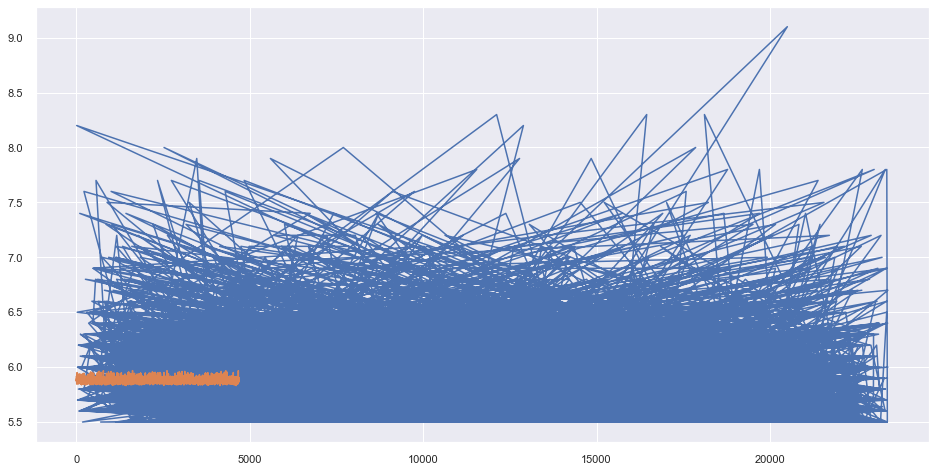

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3078807418903973
MSE: 0.17150001755819078
RMSE: 0.41412560601608633


In [ ]:
y_train

5841     5.5
2588     6.8
17328    6.1
8684     5.6
536      5.7
        ... 
21409    5.6
6009     6.2
21912    6.7
8150     5.9
22584    6.5
Name: Magnitude, Length: 18729, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train.drop(['Date','Time','Type','Magnitude Type','ID','Source','Location Source','Magnitude Source','Status'], axis=1), y_train)
dtr_pred = dtreg.predict(X_test.drop(['Date','Time','Type','Magnitude Type','ID','Source','Location Source','Magnitude Source','Status'], axis=1))
dtr_pred= dtr_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.39494056516478043
MSE: 0.32771056540204524
RMSE: 0.5724600993973686


In [8]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

NameError: name 'plt' is not defined

In [9]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [10]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train.drop(['Date','Time','Type','Magnitude Type','ID','Source','Location Source','Magnitude Source','Status'], axis=1), y_train)
rfr_pred= rfr.predict(X_test.drop(['Date','Time','Type','Magnitude Type','ID','Source','Location Source','Magnitude Source','Status'], axis=1))
rfr_pred = rfr_pred.reshape(-1,1)

NameError: name 'X_train' is not defined

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.3118767987553756
MSE: 0.18339404088594696
RMSE: 0.42824530456964377


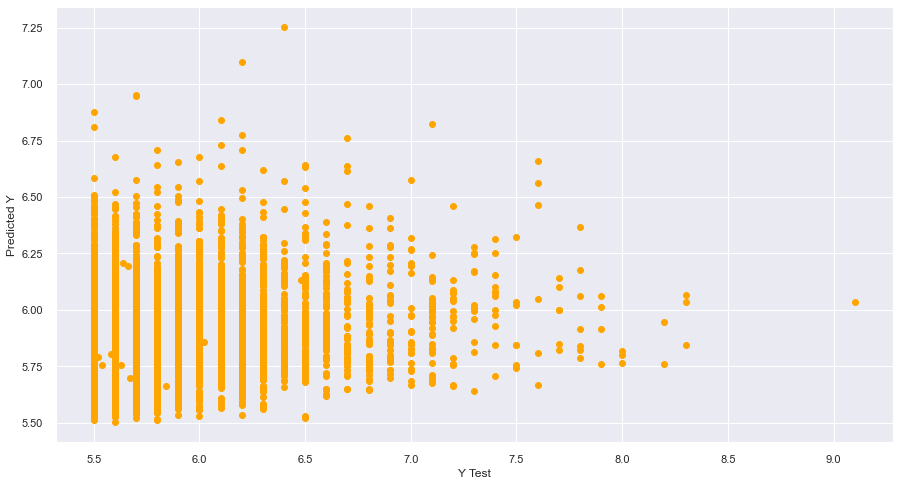

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

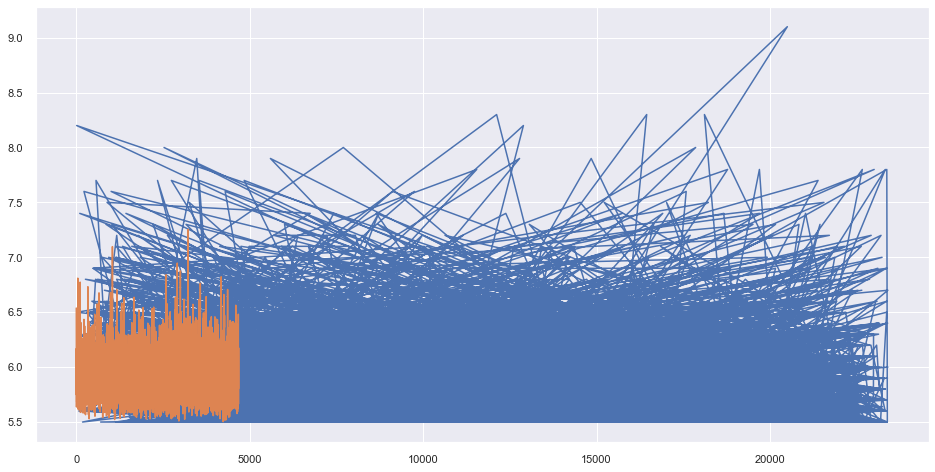

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(rfr_pred, label = 'predict')
plt.show()